In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import os
import cv2
import PIL
import tensorflow as tf
import pathlib
import pickle

from tensorflow import keras
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data_dir = pathlib.Path(".//archive/")

In [3]:
data_dir

WindowsPath('archive')

In [4]:
list(data_dir.glob("*/*.jpg"))

[WindowsPath('archive/angry/PrivateTest_10131363.jpg'),
 WindowsPath('archive/angry/PrivateTest_10304478.jpg'),
 WindowsPath('archive/angry/PrivateTest_1054527.jpg'),
 WindowsPath('archive/angry/PrivateTest_10590091.jpg'),
 WindowsPath('archive/angry/PrivateTest_1109992.jpg'),
 WindowsPath('archive/angry/PrivateTest_11296953.jpg'),
 WindowsPath('archive/angry/PrivateTest_12000629.jpg'),
 WindowsPath('archive/angry/PrivateTest_12008383.jpg'),
 WindowsPath('archive/angry/PrivateTest_12191716.jpg'),
 WindowsPath('archive/angry/PrivateTest_1221822.jpg'),
 WindowsPath('archive/angry/PrivateTest_12403575.jpg'),
 WindowsPath('archive/angry/PrivateTest_12766285.jpg'),
 WindowsPath('archive/angry/PrivateTest_12846357.jpg'),
 WindowsPath('archive/angry/PrivateTest_1290484.jpg'),
 WindowsPath('archive/angry/PrivateTest_12912780.jpg'),
 WindowsPath('archive/angry/PrivateTest_13164119.jpg'),
 WindowsPath('archive/angry/PrivateTest_13278552.jpg'),
 WindowsPath('archive/angry/PrivateTest_13463625.jpg

In [5]:
len(list(data_dir.glob("*/*.jpg")))

35887

In [6]:
emotion_dict = {
    "angry": list(data_dir.glob("angry/*.jpg")),
    "disgust": list(data_dir.glob("disgust/*.jpg")),
    "fear": list(data_dir.glob("fear/*.jpg")),
    "happy": list(data_dir.glob("happy/*.jpg")),
    "neutral": list(data_dir.glob("neutral/*.jpg")),    
    "sad": list(data_dir.glob("sad/*.jpg")),
    "surprise": list(data_dir.glob("surprise/*.jpg"))
}

In [7]:
label = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6
}

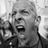

In [8]:
PIL.Image.open(emotion_dict["angry"][7])

In [9]:
X = []
y = []

for emotion_name, images in emotion_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img_resize = cv2.resize(img, (100, 100))
        X.append(img_resize)
        y.append(label[emotion_name])

In [10]:
len(X)

35887

In [11]:
len(y)

35887

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
X[0].shape

(100, 100, 3)

In [14]:
y[0]

0

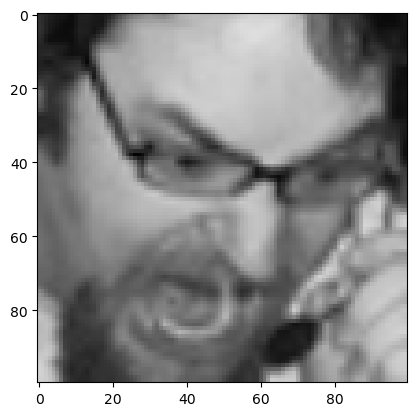

In [15]:
plt.axis()
plt.imshow(X[0])

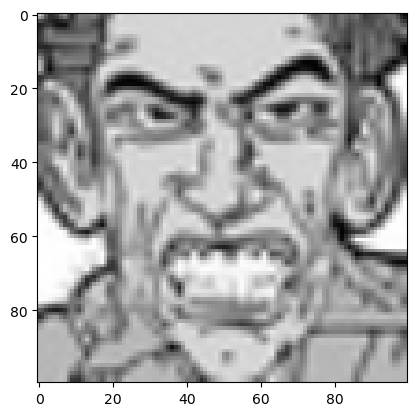

In [16]:
plt.axis()
plt.imshow(X[39])

In [17]:
y[39]

0

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [19]:
def image_with_tag(index):
    plt.axis("off")
    plt.imshow(X_train[index])
    keys_with_value = []
    for key, value in label.items():
        if value == y_train[index]:
            keys_with_value.append(key)

    print("Label is: {}".format(keys_with_value[0]))

Label is: sad


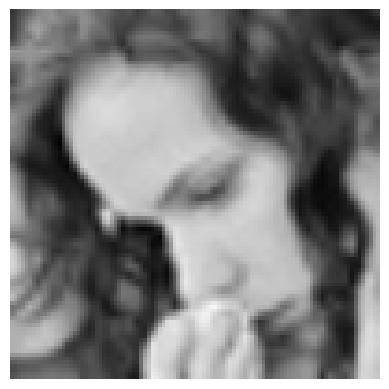

In [20]:
image_with_tag(50)

In [21]:
len(X_train)

25120

In [22]:
len(X_test)

10767

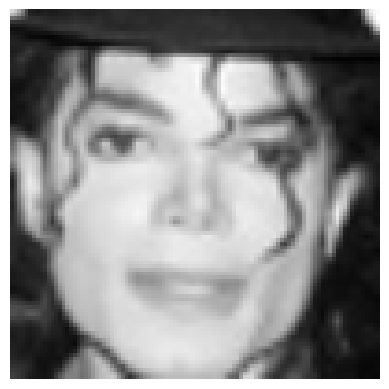

In [23]:
plt.axis("off")
plt.imshow(X_train[0])

In [24]:
X_train[0].shape

(100, 100, 3)

In [25]:
X.shape

(35887, 100, 100, 3)

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 225

In [27]:
# Data Augmentation

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.2),  
    layers.experimental.preprocessing.RandomTranslation(0.2, 0.5),
    layers.experimental.preprocessing.RandomZoom(0.2, 0.2)
])

In [28]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.4),
    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(7, activation="softmax") # 7 for 7 different classes
])

In [29]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


785/785 [==============================] - 127s 147ms/step - loss: 1.8083 - accuracy: 0.2508
Epoch 2/100
785/785 [==============================] - 113s 144ms/step - loss: 1.7927 - accuracy: 0.2522
Epoch 3/100
785/785 [==============================] - 113s 144ms/step - loss: 1.7900 - accuracy: 0.2546
Epoch 4/100
785/785 [==============================] - 113s 143ms/step - loss: 1.7884 - accuracy: 0.2534
Epoch 5/100
785/785 [==============================] - 113s 144ms/step - loss: 1.7858 - accuracy: 0.2551
Epoch 6/100
785/785 [==============================] - 111s 142ms/step - loss: 1.7845 - accuracy: 0.2572
Epoch 7/100
785/785 [==============================] - 112s 143ms/step - loss: 1.7855 - accuracy: 0.2543
Epoch 8/100
785/785 [==============================] - 112s 143ms/step - loss: 1.7809 - accuracy: 0.2568
Epoch 9/100
785/785 [==============================] - 112s 142ms/step - loss: 1.7791 - accuracy: 0.2577
Epoch 10/100
785/785 [==============================] - 111s 142ms/

785/785 [==============================] - 111s 142ms/step - loss: 1.7072 - accuracy: 0.3055
Epoch 68/100
785/785 [==============================] - 111s 141ms/step - loss: 1.7046 - accuracy: 0.3066
Epoch 69/100
785/785 [==============================] - 110s 140ms/step - loss: 1.7077 - accuracy: 0.3076
Epoch 70/100
785/785 [==============================] - 111s 141ms/step - loss: 1.7059 - accuracy: 0.3075
Epoch 71/100
785/785 [==============================] - 110s 140ms/step - loss: 1.7040 - accuracy: 0.3097
Epoch 72/100
785/785 [==============================] - 111s 141ms/step - loss: 1.7045 - accuracy: 0.3074
Epoch 73/100
785/785 [==============================] - 110s 141ms/step - loss: 1.7069 - accuracy: 0.3055
Epoch 74/100
785/785 [==============================] - 111s 141ms/step - loss: 1.7034 - accuracy: 0.3094
Epoch 75/100
785/785 [==============================] - 110s 140ms/step - loss: 1.6997 - accuracy: 0.3115
Epoch 76/100
785/785 [==============================] - 110

In [ ]:
model.evaluate(X_test_scaled, y_test)

In [ ]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]

In [ ]:
epochs = range(1, len(train_loss) + 1)

In [ ]:
epochs

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Training Loss")
plt.title("Training and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label="Accuracy")
plt.title("Training and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
def capture_image():
    cap = cv2.VideoCapture(0)

    while(True):
        ret, frame = cap.read()
        cv2.imshow("frame", frame)
        if cv2.waitKey(1) and 0xFF == ord("q"):
            break
    cap.release()
    cv2.destroyAllWindows()
    
    return frame

In [ ]:
def preprocess_image(image):
    resized_image = cv2.resize(image, (100, 100)) / 255.0
    
    return np.expand_dims(resized_image, axis=0)

In [ ]:
def predict_emotion(image, model):
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)
    emotion_labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    
    return predicted_emotion

In [ ]:
def predict_emotion_from_camera(model):
    image = capture_image()
    emotion = predict_emotion(image, model)
    
    return emotion

In [ ]:
if __name__ == "__main__":
    model = keras.models.load_model("../model.h5")
    predicted_emotion = predict_emotion_from_camera(model)
    print("Predicted emotion:", predicted_emotion)